# Assignement 3, Data science in practice, MGT-415, 26.04.2020
## Aubry Yannick, Fontannaz Benoît, Muret Gabriel Pierre Etienne, Tedeschi Julien Brian, Terrier Cédric

# Pseudo - Code for SQL google Big query 
SELECT
  *
FROM
  `patents-public-data.patents.publications`,
  UNNEST(cpc) AS cpc
WHERE
   cpc.code LIKE "G06Q30/06%"
  


In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import networkx.algorithms.community as nxcom

In [309]:
data = pd.read_excel('network_data.xlsx')
print(data.shape)
print(data.dtypes)
data.head()

(88234, 2)
NodeA    int64
NodeB    int64
dtype: object


,NodeA,NodeB
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [310]:
NETWORK = nx.Graph()
length_data = len(data)
for i in range(length_data):
    NETWORK.add_edge(data.NodeA[i],data.NodeB[i])

<function matplotlib.pyplot.show(*args, **kw)>

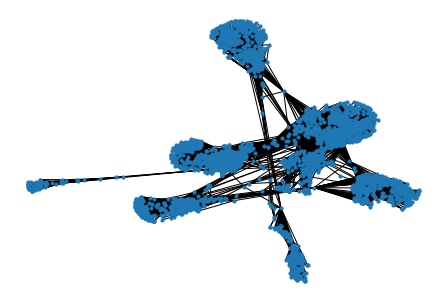

In [311]:
nx.draw(NETWORK, node_size=10)
plt.show

### We now analyse the graphic in a more detailed way, in order to get the Leader(s), Central Actors and Irrelevant ones.

In the following, some indicators about the connectivity of the network are calculated. The degree, degree centrality, betweenness and eigenvector centrality are the indicators selected to analyse the network.

In [312]:
results1 = pd.DataFrame(NETWORK.degree(), columns = ['node','degree'])

In [313]:
degree_centrality = nx.degree_centrality(NETWORK)
results2 = pd.DataFrame(degree_centrality.items(), columns = ['node','degree_centrality'])

In [314]:
betweenness = nx.betweenness_centrality(NETWORK)
results3 = pd.DataFrame(betweenness.items(), columns = ['node','betweenness'])

In [315]:
eig_centr = nx.eigenvector_centrality(NETWORK)
results4 = pd.DataFrame(eig_centr.items(), columns = ['node','eigenvector_centrality'])

In [3]:
results = results1.join(results2.degree_centrality).join(results3.betweenness).join(results4.eigenvector_centrality)
results =results.sort_values(['node'])
results = results.set_index('node')

NameError: name 'results1' is not defined

Four graph representing the distribution of the indicators are delivered. They present a distribution with a large tail, meaning that most of the nodes have a low connectivity and only a few one are highly important for the network. It means that a few patents are highly relevant for the global knowledge. This effect is clearly visible on the two last histogram where only a few nodes possess a high betweenness and eigenvector centrality. Later, we will foccus on these patents by highlighting them.

Text(0.5, 1.0, 'Eigenvector centrality distribution')

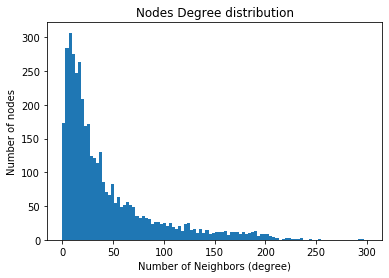

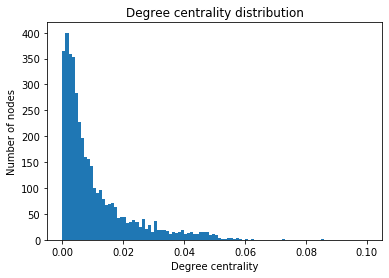

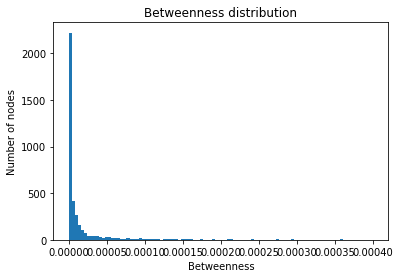

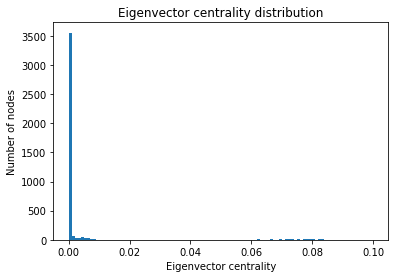

In [317]:
degree_hist = plt.hist(results.degree, 100, range = [0,300])
plt.xlabel('Number of Neighbors (degree)')
plt.ylabel('Number of nodes')
plt.title('Nodes Degree distribution')

plt.figure()
degree_hist = plt.hist(results.degree_centrality, 100, range = [0,0.1])
plt.xlabel('Degree centrality')
plt.ylabel('Number of nodes')
plt.title('Degree centrality distribution')

plt.figure()
degree_hist = plt.hist(results.betweenness, 100, range = [0,0.0004])
plt.xlabel('Betweenness')
plt.ylabel('Number of nodes')
plt.title('Betweenness distribution')

plt.figure()
degree_hist = plt.hist(results.eigenvector_centrality, 100, range = [0,0.1])
plt.xlabel('Eigenvector centrality')
plt.ylabel('Number of nodes')
plt.title('Eigenvector centrality distribution')

In [318]:
density = nx.density(NETWORK)
av_path = nx.average_shortest_path_length(NETWORK)
print('The density of the network is:', density)
print("The average shortest path length of the network is:", av_path)

The density of the network is: 0.010819963503439287
The average shortest path length of the network is: 3.6925068496963913


### We can get now try te define which are the Leader(s), Central Actors and Irrelevant Actors by looking at the nodes Degree, the Degree centrality, the Betweeness and the Eigenvector Centrality of each node
#### If we had to define only one leader, we'll try to define it as the one having the largest values from each of this parameter
For the Central Actors, it would be the ones having the largest betweeness and the largest eigenvector centrality. Indeed, these two indicators define in an efficient way the importance of the node for the connectivity of the network.
The irrelevant actors would be the node having a really small betweeness and a small degree centrality

In [319]:
Childrens = data["NodeA"].value_counts()
Parents = data["NodeB"].value_counts()

results["Number_of_Parents"]=Parents
results["Number_of_Childrens "]=Childrens

results = results.fillna(0)
results.head(355)

,degree,degree_centrality,betweenness,eigenvector_centrality,Number_of_Parents,Number_of_Childrens
node,,,,,,
0,347,0.085934,1.463059e-01,3.391796e-05,0.0,347.0
1,17,0.004210,2.783274e-06,6.045346e-07,1.0,16.0
2,10,0.002476,7.595021e-08,2.233461e-07,1.0,9.0
3,17,0.004210,1.685066e-06,6.635648e-07,1.0,16.0
4,10,0.002476,1.840332e-07,2.236416e-07,1.0,9.0
...,...,...,...,...,...,...
350,21,0.005201,7.762644e-05,4.343228e-06,1.0,20.0
351,5,0.001238,6.925832e-06,9.620986e-08,2.0,3.0
352,23,0.005696,7.648752e-07,7.921576e-07,1.0,22.0


In [320]:
results.head(1914)

,degree,degree_centrality,betweenness,eigenvector_centrality,Number_of_Parents,Number_of_Childrens
node,,,,,,
0,347,0.085934,1.463059e-01,3.391796e-05,0.0,347.0
1,17,0.004210,2.783274e-06,6.045346e-07,1.0,16.0
2,10,0.002476,7.595021e-08,2.233461e-07,1.0,9.0
3,17,0.004210,1.685066e-06,6.635648e-07,1.0,16.0
4,10,0.002476,1.840332e-07,2.236416e-07,1.0,9.0
...,...,...,...,...,...,...
1909,41,0.010154,1.972276e-04,4.145730e-05,40.0,1.0
1910,31,0.007677,8.731244e-06,2.577765e-06,31.0,0.0
1911,39,0.009658,1.843262e-04,3.856502e-05,39.0,0.0


In [321]:
results.describe()

,degree,degree_centrality,betweenness,eigenvector_centrality,Number_of_Parents,Number_of_Childrens
count,4039.000000,4039.000000,4.039000e+03,4.039000e+03,4039.000000,4039.000000
mean,43.691013,0.010820,6.669574e-04,3.864341e-03,21.845506,21.845506
std,52.420605,0.012982,1.164634e-02,1.525485e-02,29.269857,38.904137
min,1.000000,0.000248,0.000000e+00,6.385265e-14,0.000000,0.000000
25%,11.000000,0.002724,3.997507e-07,5.388575e-08,4.000000,3.000000
50%,25.000000,0.006191,2.918300e-06,8.885652e-07,11.000000,10.000000
75%,57.000000,0.014116,1.515292e-05,3.266349e-05,27.000000,26.000000
max,1045.000000,0.258791,4.805181e-01,9.540696e-02,251.000000,1043.000000


In [329]:
Central_Players = np.array([])
Leaders = np.array([])
Irrelevant_Actors = np.array([])

for i in range(4039):
    if results.loc[i].values[3]<5.388575e-08 and results.loc[i].values[2] < 0.0005:
        Irrelevant_Actors = np.append(Irrelevant_Actors, i)
    if results.loc[i].values[2] > 0.48: # or results.loc[i].values[3]>0.0954
        Leaders = np.append(Leaders,i)
    elif (results.loc[i].values[3]>0.05 or results.loc[i].values[2]>0.01) and results.loc[i].values[0]>100 and results.loc[i].values[5]>50:
        Central_Players =np.append(Central_Players, i)
   
        

print("Nombre de irrelevants actors :",len(Irrelevant_Actors))
print("Nombre de Central Players : ",len(Central_Players))
print("Nombre de Leaders :", len(Leaders))
print(Leaders)
print(Central_Players)

results.head(108)


Nombre de irrelevants actors : 967
Nombre de Central Players :  135
Nombre de Leaders : 1
[107.]
[   0.  136.  348.  414.  428.  483.  686. 1465. 1577. 1684. 1718. 1912.
 1917. 1918. 1925. 1929. 1938. 1941. 1943. 1946. 1953. 1962. 1966. 1971.
 1979. 1983. 1984. 1985. 1986. 1993. 1997. 2005. 2020. 2030. 2033. 2037.
 2040. 2043. 2045. 2046. 2059. 2063. 2064. 2069. 2073. 2074. 2077. 2078.
 2083. 2084. 2086. 2088. 2090. 2093. 2095. 2098. 2103. 2104. 2108. 2109.
 2112. 2115. 2118. 2121. 2122. 2123. 2124. 2131. 2139. 2140. 2142. 2150.
 2154. 2165. 2172. 2184. 2188. 2190. 2200. 2201. 2206. 2212. 2216. 2218.
 2220. 2229. 2233. 2237. 2240. 2244. 2253. 2257. 2261. 2266. 2271. 2275.
 2276. 2278. 2290. 2299. 2306. 2307. 2308. 2309. 2323. 2324. 2326. 2329.
 2331. 2334. 2339. 2340. 2347. 2348. 2352. 2354. 2356. 2359. 2363. 2369.
 2370. 2374. 2376. 2381. 2386. 2395. 2404. 2408. 2409. 2410. 2414. 2428.
 2460. 2464. 3437.]


,degree,degree_centrality,betweenness,eigenvector_centrality,Number_of_Parents,Number_of_Childrens
node,,,,,,
0,347,0.085934,1.463059e-01,3.391796e-05,0.0,347.0
1,17,0.004210,2.783274e-06,6.045346e-07,1.0,16.0
2,10,0.002476,7.595021e-08,2.233461e-07,1.0,9.0
3,17,0.004210,1.685066e-06,6.635648e-07,1.0,16.0
4,10,0.002476,1.840332e-07,2.236416e-07,1.0,9.0
...,...,...,...,...,...,...
103,16,0.003962,9.419041e-05,2.509602e-05,5.0,11.0
104,32,0.007925,3.015535e-06,1.435568e-06,9.0,23.0
105,14,0.003467,4.083494e-07,6.408392e-07,6.0,8.0


In [330]:
print(results.loc[Central_Players])

        degree  degree_centrality  betweenness  eigenvector_centrality  \
node                                                                     
0.0        347           0.085934     0.146306            3.391796e-05   
136.0      133           0.032937     0.026870            3.894375e-03   
348.0      229           0.056711     0.037998            1.458780e-05   
414.0      159           0.039376     0.047633            1.213415e-05   
428.0      115           0.028479     0.064309            5.990065e-04   
...        ...                ...          ...                     ...   
2414.0     183           0.045319     0.000008            7.755190e-02   
2428.0     191           0.047301     0.000014            7.872524e-02   
2460.0     169           0.041852     0.000005            7.269227e-02   
2464.0     202           0.050025     0.000008            8.427877e-02   
3437.0     547           0.135463     0.236115            9.531613e-08   

        Number_of_Parents  Number_of_

### New representation of the graphic: the irrelevant players are deleted and the Leader (in red) as well as the Major Actors (in green) are highlighted

<function matplotlib.pyplot.show(*args, **kw)>

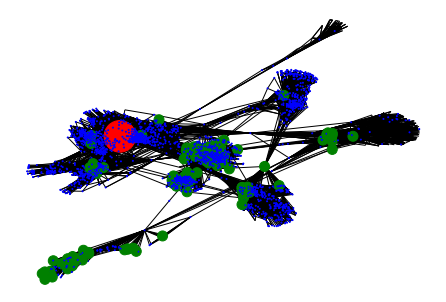

In [331]:
Update1 = pd.DataFrame(np.ones([len(results)]))
Update2 =['b' for i in range(len(results))]
for i in (Irrelevant_Actors):
    Update1.loc[i].values[0]=0
for i in (Leaders):
    Update1.loc[i].values[0]=1000
    j = int(i)
    Update2[j] = 'r'
for i in (Central_Players):
    Update1.loc[i].values[0]=100
    j = int(i)
    Update2[j] = 'g'
    
nx.draw(NETWORK, node_size = Update1, node_color = Update2)
plt.show



In [4]:
communities = sorted(nxcom.greedy_modularity_communities(NETWORK), key=len, reverse=True)

NameError: name 'nxcom' is not defined

The graphic below shows the density of the connection within the network. The clutsers of nodes are highly visible. We can enumerate roughly 15 clusters in the network.

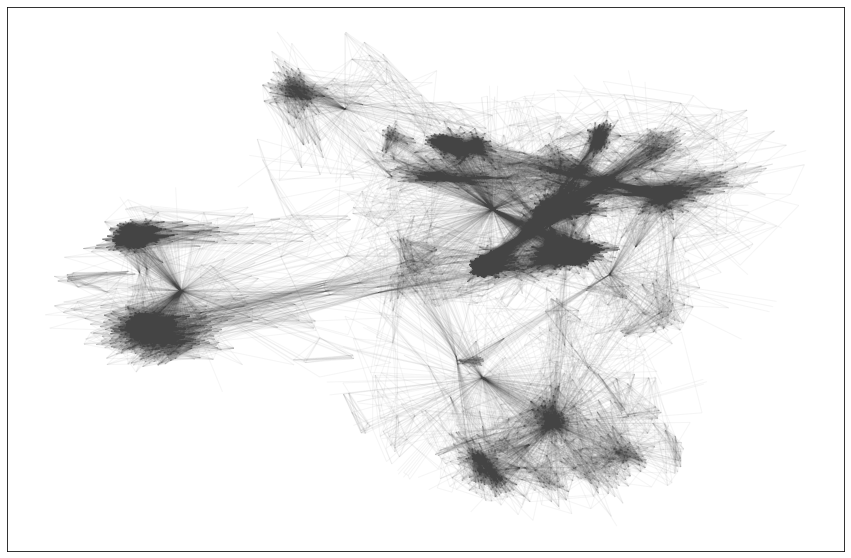

In [342]:
pos = nx.spring_layout(NETWORK, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(
NETWORK, 
pos=pos, 
node_size=0, 
edge_color="#444444", 
alpha=0.05, 
with_labels=False)